In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wingo-color-prediction/Win-Go.csv.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/wingo-color-prediction/Win-Go.csv.csv')
df.head()

,Period,Price,Number,Color
0,20200729238,86354,4,Red
1,20200729237,86366,6,Red
2,20200729236,86362,2,Red
3,20200729235,86361,1,Green
4,20200729234,86365,5,Green-Violet


In [4]:
df.columns

Index(['Period', 'Price', 'Number', 'Color'], dtype='object')

In [5]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Period  9999 non-null   int64 
 1   Price   9999 non-null   int64 
 2   Number  9999 non-null   int64 
 3   Color   9999 non-null   object
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [6]:
# Check unique values in 'Color'
df['Color'].value_counts()

Color
Red             3992
Green           3970
Red-Violet      1041
Green-Violet     996
Name: count, dtype: int64

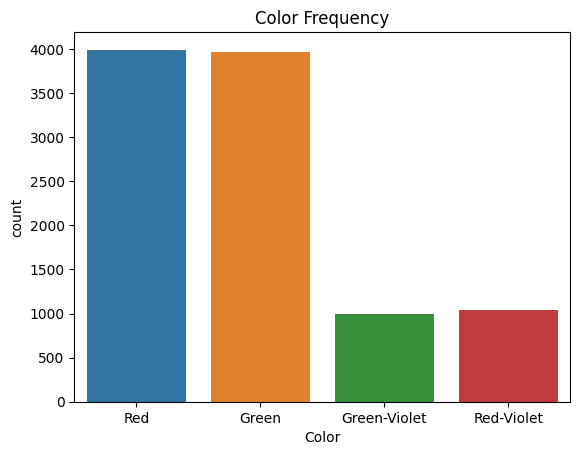

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Color distribution
sns.countplot(data=df, x='Color')
plt.title('Color Frequency')
plt.show()

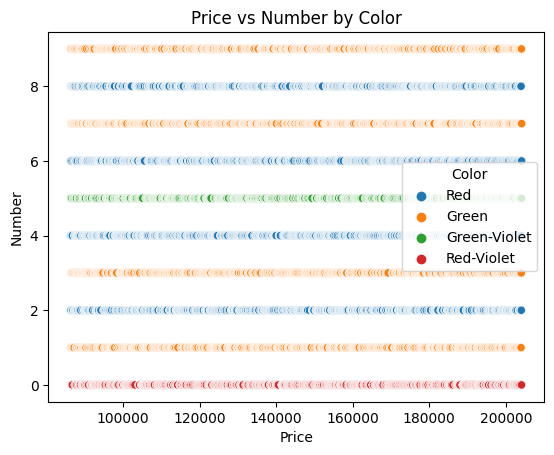

In [8]:
# Convert Period to datetime if needed
# df['Period'] = pd.to_datetime(df['Period'])  # Uncomment if it's a datetime string

# Price vs Number colored by Color
sns.scatterplot(data=df, x='Price', y='Number', hue='Color')
plt.title('Price vs Number by Color')
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

# Drop 'Period' (not useful for prediction)
df = df.drop('Period', axis=1)

# Encode target variable
le = LabelEncoder()
df['Color'] = le.fit_transform(df['Color'])  # Red=2, Green=1, Violet=0 (or similar)

In [10]:
# Features and target
X = df.drop('Color', axis=1)
y = df['Color']

In [11]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Train LightGBM model (fast + powerful)
model = LGBMClassifier()
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 265
[LightGBM] [Info] Number of data points in the train set: 7999, number of used features: 2
[LightGBM] [Info] Start training from score -0.916166
[LightGBM] [Info] Start training from score -2.288804
[LightGBM] [Info] Start training from score -0.928112
[LightGBM] [Info] Start training from score -2.270477
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

LGBMClassifier()

In [13]:
# Predict
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       770
           1       1.00      1.00      1.00       185
           2       1.00      1.00      1.00       830
           3       1.00      1.00      1.00       215

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



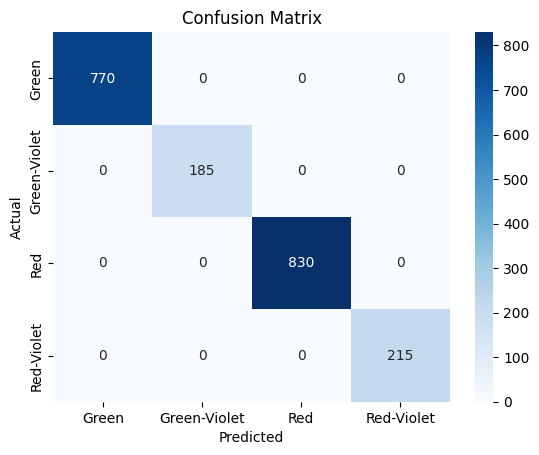

In [14]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Show as heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()